<a href="https://colab.research.google.com/github/luigivendetta/dog_breed_identification/blob/master/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# This is a Colab Notebook
End-to-end multi-class image classifier (dog breed identification) using tensorflow and tensorflow hub.
## 1. Problem:
Identifying the breed of a dog though an image.
## 2. Data:
Using data from dog breed identification competition on kaggle.
source: https://www.kaggle.com/c/dog-breed-identification/data
## 3. Evaluation:
evaluated on Multi Class Log Loss between the predicted probability and the observed target.
source: https://www.kaggle.com/c/dog-breed-identification/overview/evaluation
## 4. Features:
* We are dealing with image data (unstructured data), it's best to use deep learning/transfer learning.
* There are 120 breeds of dog (this means there are 120 different classes).
* There are 10,222 train sample images.
* There are 10,357 test images.
images have no label.







In [0]:
# Unzipping the data in our google drive:
#!unzip "/content/drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/My Drive/Dog Vision/"

### Getting our workspace ready

In [3]:
# Importing TensorFlow into Colab
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.2.0


In [4]:
import tensorflow_hub as hub
print("TensorFlowHub Version:", hub.__version__)

TensorFlowHub Version: 0.8.0


In [5]:
# Checking for GPU availabilty
print("GPU", "available :)" if tf.config.list_physical_devices("GPU") else "not available :(")


GPU available :)


In [6]:
#Importing labels.csv
labels = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [7]:
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     e229e4628facf3fb9cd030e0ac484722  scottish_deerhound
freq                                   1                 126

In [8]:
labels.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

Text(0, 0.5, 'Total Count of Dogs')

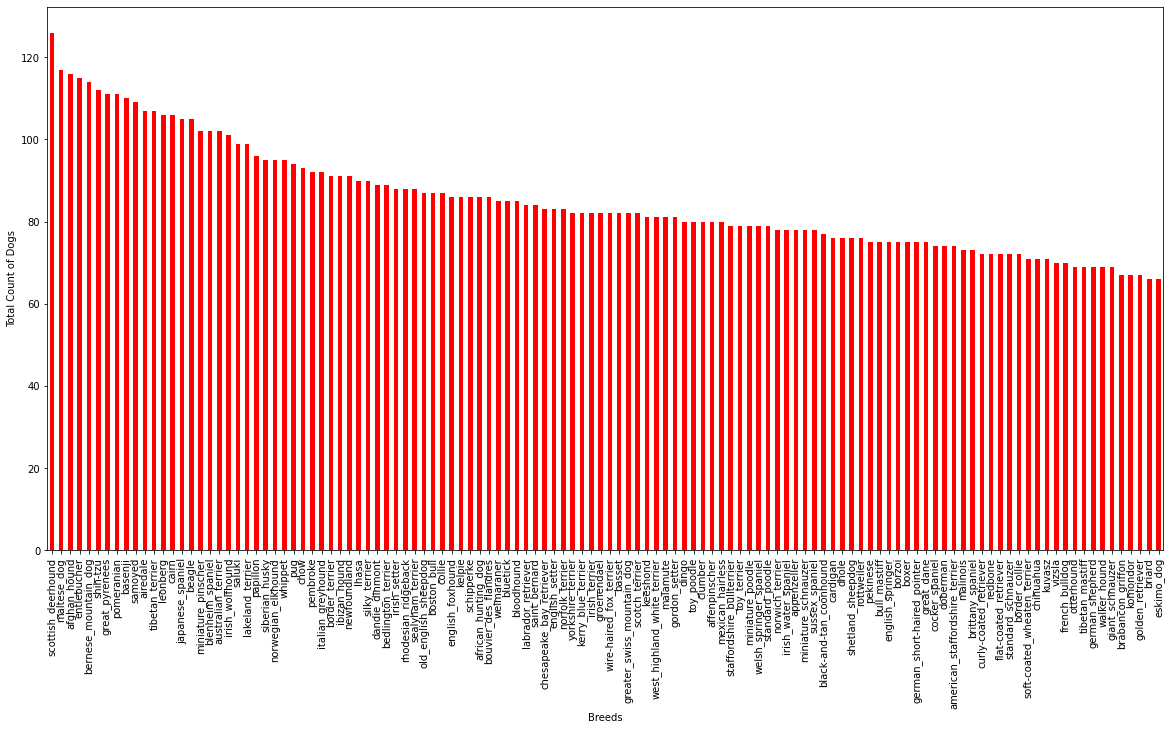

In [9]:
labels.breed.value_counts().plot(kind="bar",figsize=(20,10), color="red")
plt.xlabel("Breeds")
plt.ylabel("Total Count of Dogs")

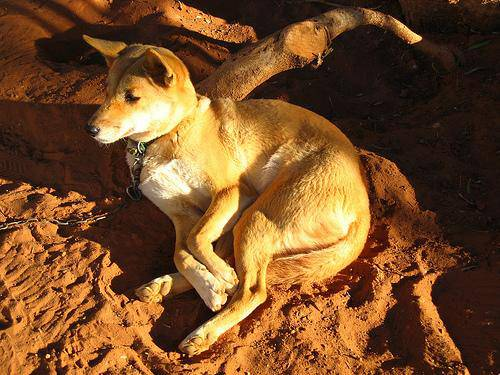

In [10]:
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [11]:
filename = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels.id]
len(filename)

10222

In [12]:
import os
if(len(os.listdir("drive/My Drive/Dog Vision/train/"))) == len(filename):
  print("Filenames match actual amount of file: Proceed!")
else:
  print("Filenames doesn\'t match actual amount of files: Check the directory.")

Filenames match actual amount of file: Proceed!


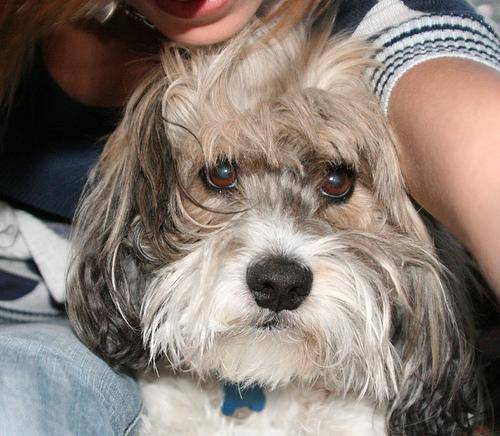

In [13]:
Image(filename[900])

In [14]:
breed = np.array(labels.breed)
breed

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(breed)

10222

In [16]:
labels.isna().sum()

id       0
breed    0
dtype: int64

In [17]:
unique_breed = np.unique(breed)
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [18]:
len(unique_breed)

120

### Turning single label(breed) into booleans

In [19]:
breed[10000] == unique_breed

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
breed_booleans = [x == unique_breed for x in breed]
len(breed_booleans)

10222

In [21]:
breed_booleans[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
# converting booleans to integers:
print(breed[0])
print(np.where(unique_breed == breed[0]))
print(breed_booleans[0].argmax())
print(breed_booleans[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
# Creating X & Y labels:
X = filename
Y = breed_booleans

### Creating a Validation Set
because data from kaggle doesn't provide a validation set

In [0]:
NUM_IMAGE = 1000 #@param {type:"slider", min:1000, max:10000, step:100}

In [25]:
# Splitting our Data
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X[:NUM_IMAGE],
                                                      Y[:NUM_IMAGE],
                                                      test_size=0.2,
                                                      random_state=61)
len(X_train), len(Y_train), len(X_valid), len(Y_valid)

(800, 800, 200, 200)

In [26]:
X_train[:5], Y_train[0]

(['drive/My Drive/Dog Vision/train/04d2dc1f2804c748b1aa71954bb45d38.jpg',
  'drive/My Drive/Dog Vision/train/16df5020c2b6ac3f70fb3a5c27c5175e.jpg',
  'drive/My Drive/Dog Vision/train/0ddbc4702eff570783cd03645571e7f7.jpg',
  'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
  'drive/My Drive/Dog Vision/train/0325e6ba5b6afd3e0dd94c3a77b6de59.jpg'],
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, Fals

## Preprocessing Images
* ## Turning Images into Tensors

In [27]:
from matplotlib.pyplot import imread
image = imread(filename[61])
image.shape

(280, 200, 3)

In [28]:
image.max(), image.min()

(255, 0)

In [29]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 200, 3), dtype=uint8, numpy=
array([[[242, 241, 239],
        [242, 241, 239],
        [242, 241, 239],
        ...,
        [249, 251, 250],
        [249, 251, 250],
        [250, 252, 251]],

       [[242, 241, 239],
        [242, 241, 239],
        [242, 241, 239],
        ...,
        [248, 250, 249],
        [249, 251, 250],
        [249, 251, 250]]], dtype=uint8)>

In [30]:
image[:2]

array([[[242, 241, 239],
        [242, 241, 239],
        [242, 241, 239],
        ...,
        [249, 251, 250],
        [249, 251, 250],
        [250, 252, 251]],

       [[242, 241, 239],
        [242, 241, 239],
        [242, 241, 239],
        ...,
        [248, 250, 249],
        [249, 251, 250],
        [249, 251, 250]]], dtype=uint8)

In [0]:
# Setting Image Size:
#IMG_SIZE = [224,224]
# Function for preprocessing the  images:
def preprocess_img(image_path, IMG_SIZE = [224,224]):
  """
  Takes an Image file path and converts it into a tensor.
  """
  # reading a filepath
  image = tf.io.read_file(image_path)
  # converting images into tensors
  image = tf.image.decode_jpeg(image, channels=3)
  # Normalizing the images from 0-255 to 0-1 float values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resizing the image
  image = tf.image.resize(image, size= IMG_SIZE)  
  return image

In [0]:
# tensor = tf.io.read_file(filename[24])
# tensor
# tensor = tf.image.decode_jpeg(tensor, channels=3)
# tf.image.convert_image_dtype(tensor, tf.float32)

### Turning pr Data into Batches
* processing 32 images at a time

In [0]:
def get_image_label(image_path, label):
  #label = tf.constant(label)
  image = preprocess_img(image_path)
  return image, label

In [34]:
get_image_label(X[61],tf.constant(Y[61]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.9450981 , 0.94117653, 0.92549026],
         [0.9450981 , 0.94117653, 0.92549026],
         [0.94796926, 0.9440477 , 0.9283614 ],
         ...,
         [0.9681373 , 0.9838236 , 0.979902  ],
         [0.9681373 , 0.9838236 , 0.979902  ],
         [0.9681373 , 0.9838236 , 0.979902  ]],
 
        [[0.9450981 , 0.94117653, 0.92549026],
         [0.9450981 , 0.94117653, 0.92549026],
         [0.94796926, 0.9440477 , 0.9283614 ],
         ...,
         [0.9632354 , 0.97892165, 0.9750001 ],
         [0.9632354 , 0.97892165, 0.9750001 ],
         [0.9632354 , 0.97892165, 0.9750001 ]],
 
        [[0.9450981 , 0.94117653, 0.92549026],
         [0.9450981 , 0.94117653, 0.92549026],
         [0.94796926, 0.9440477 , 0.9283614 ],
         ...,
         [0.9583334 , 0.97401965, 0.9700981 ],
         [0.9583334 , 0.97401965, 0.9700981 ],
         [0.9583334 , 0.97401965, 0.9700981 ]],
 
        ...,
 
        [[0.13186276, 0.13186276

In [0]:
BATCH_SIZE = 32
# Creating func to turn data into batches
def create_data_batches(X, y=None, batch_size= BATCH_SIZE, valid_data= False, test_data= False):
  """
  creates  batch of data
  """
  if test_data:
    print("Creating Test Data Batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(preprocess_img).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating Valid Data Batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating Training Data Batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data = data.shuffle(buffer_size = len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [36]:
train_data = create_data_batches(X_train, Y_train)
valid_data = create_data_batches(X_valid, Y_valid, valid_data= True)

Creating Training Data Batches...
Creating Valid Data Batches...


In [37]:
print(train_data.element_spec)
print(valid_data.element_spec)

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))


## Visualizing our data batches

In [0]:
def show_images(image, label):
  """
  display 25 images from batch samples:
  """
  plt.figure(figsize=(15,15))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image[i])
    plt.title(unique_breed[label[i].argmax()])
    plt.axis("off")

In [39]:
train_image, train_label = next(train_data.as_numpy_iterator())
len(train_image), len(train_label)

(32, 32)

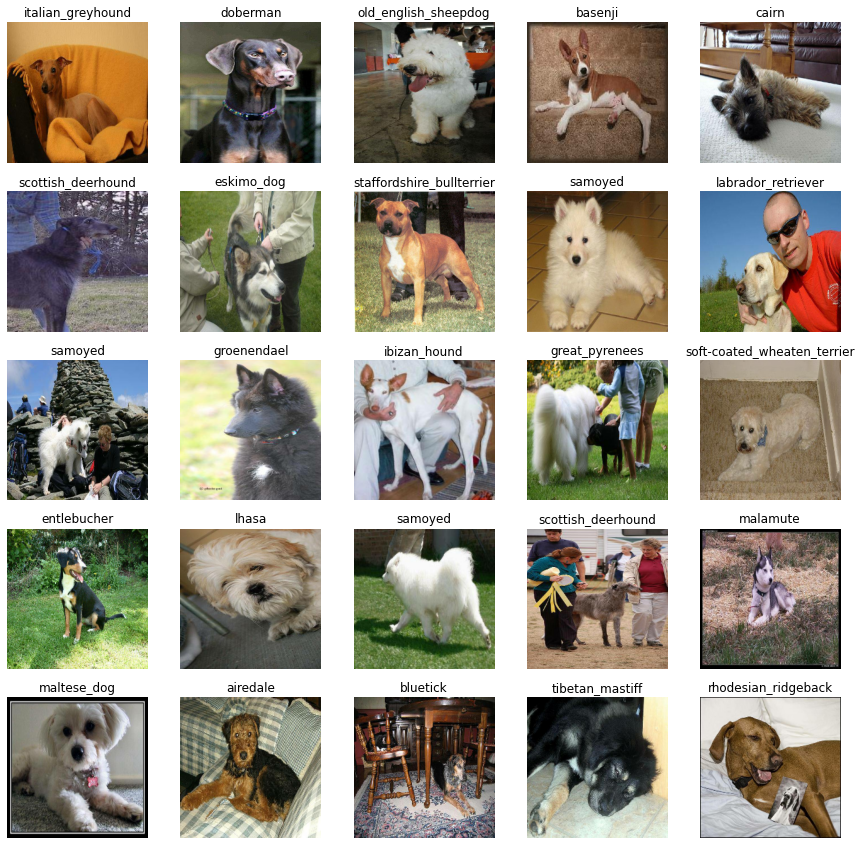

In [40]:
show_images(train_image, train_label)

In [41]:
valid_image, valid_label = next(valid_data.as_numpy_iterator())
len(valid_image), len(valid_label)

(32, 32)

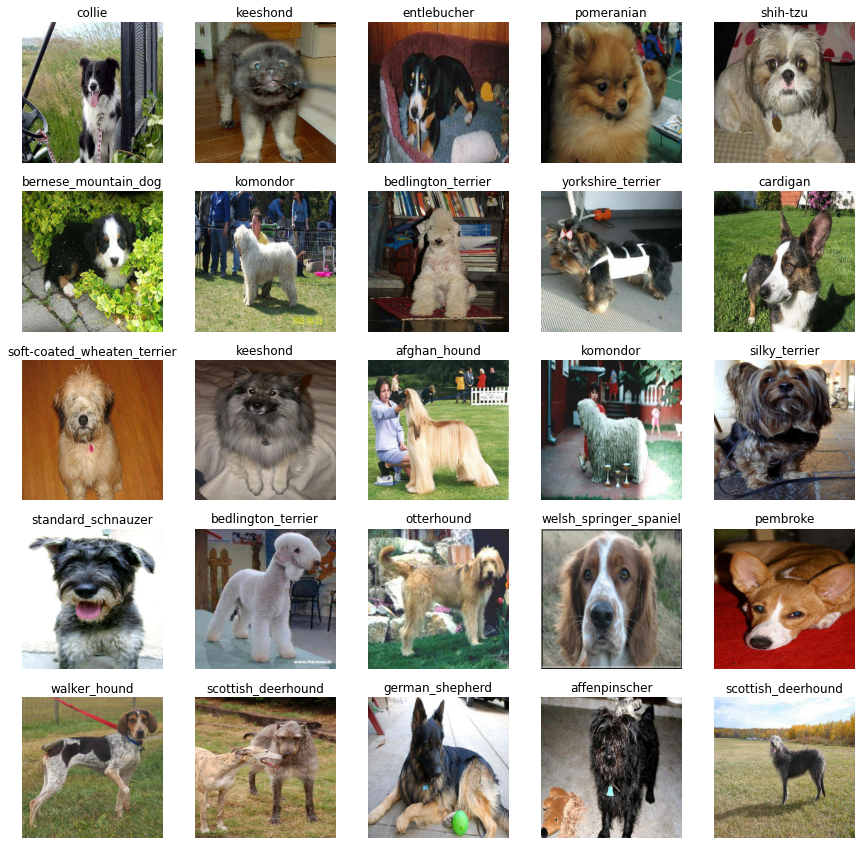

In [42]:
show_images(valid_image, valid_label)

### Preparing Inputs ans Outputs:


In [0]:
INPUT_SHAPE = [None, 224, 224, 3]
OUTPUT_SHAPE = len(unique_breed)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

## Creating DL model:

In [0]:
def create_model(input_shape= INPUT_SHAPE, output_shape= OUTPUT_SHAPE, model_url= MODEL_URL):
  print("Building Model with:", model_url)
  model = tf.keras.Sequential([hub.KerasLayer(model_url), #Layer 1 (input layer)
                               tf.keras.layers.Dense(units= output_shape,
                               activation= "softmax")])  #Layer 2 (output layer)
  # Compiling the Model:
  model.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])
  # Building the Model:
  model.build(input_shape)
  return model

In [45]:
model = create_model()
model.summary()

Building Model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating Callbacks
* `helper function` a model can use during training to do things such as save its progress, check its progress and stop training when model is not improving.
* using `tensorboard` to prevent our model from training for too long.

In [0]:
# Loading TensorBoard
%load_ext tensorboard

In [0]:
import datetime
def tensorboard_callback():
  """
  To build a tensorboard callback:
  """
  logdir= os.path.join("/content/drive/My Drive/Dog Vision/logs",
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback
* to prevent overfitting
* source: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [0]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= "val_accuracy", patience= 3)

### Traing the model on a subset of the data:
* using only 1000 training samples

In [0]:
NUM_EPOCH = 100 #@param {type:"slider", min:10, max:100, step:10}

### Training and checking progress:

In [0]:
def train_model():
  """
  Trains a given model and returns a trained version
  """
  # creating a model:
  model = create_model()
  # creating a tensorboard session:
  tensorboard = tensorboard_callback()
  # fitting the model by passing the callbacks :
  model.fit(x=train_data,
            epochs= NUM_EPOCH,
            validation_data= valid_data,
            validation_freq= 1,
            callbacks= [tensorboard, early_stopping])
  return model


In [108]:
model = train_model()

Building Model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 311s 12s/step - loss: 4.4434 - accuracy: 0.1112 - val_loss: 3.2490 - val_accuracy: 0.2850
Epoch 2/100
25/25 [==============================] - 5s 196ms/step - loss: 1.6068 - accuracy: 0.6913 - val_loss: 1.9330 - val_accuracy: 0.5700
Epoch 3/100
25/25 [==============================] - 5s 194ms/step - loss: 0.5505 - accuracy: 0.9475 - val_loss: 1.5028 - val_accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 5s 202ms/step - loss: 0.2464 - accuracy: 0.9900 - val_loss: 1.3124 - val_accuracy: 0.6800
Epoch 5/100
25/25 [==============================] - 5s 212ms/step - loss: 0.1441 - accuracy: 1.0000 - val_loss: 1.2360 - val_accuracy: 0.6850
Epoch 6/100
25/25 [==============================] - 5s 196ms/step - loss: 0.0994 - accuracy: 1.0000 - val_loss: 1.1869 - val_accuracy: 0.6900
Epoch 7/100
25/25 [==============================

In [109]:
%tensorboard --logdir /content/drive/My\ Drive/Dog\ Vision/logs

Reusing TensorBoard on port 6006 (pid 828), started 0:11:30 ago. (Use '!kill 828' to kill it.)

<IPython.core.display.Javascript object>

In [110]:
prediction = model.predict(valid_data, verbose=1)
prediction

7/7 [==============================] - 1s 128ms/step


array([[6.8209403e-05, 3.8847793e-05, 6.7662062e-05, ..., 9.0171052e-05,
        8.1329903e-04, 2.9460864e-05],
       [2.8849152e-04, 5.1364594e-04, 1.5521490e-04, ..., 4.8528214e-05,
        1.8570072e-05, 1.7368606e-03],
       [8.1390317e-04, 9.9698387e-05, 4.8645036e-04, ..., 5.5708915e-05,
        2.4771257e-04, 1.5970068e-05],
       ...,
       [5.3769054e-05, 1.0437100e-04, 2.5744812e-04, ..., 7.1704176e-06,
        3.3470606e-05, 5.4520562e-05],
       [2.4985653e-04, 2.9188531e-04, 1.1630626e-04, ..., 3.1073549e-04,
        1.3742967e-04, 2.0753881e-05],
       [1.4901427e-03, 1.4120496e-04, 3.8642349e-04, ..., 2.0632456e-04,
        2.5309494e-04, 4.6954779e-03]], dtype=float32)

In [111]:
prediction.shape

(200, 120)

In [112]:
print(prediction[0])

[6.82094033e-05 3.88477929e-05 6.76620621e-05 8.19972593e-06
 1.71728467e-03 1.12981079e-02 4.59442072e-06 4.40174830e-04
 7.48239336e-06 4.73097098e-05 1.29662934e-04 2.47037830e-03
 1.57463103e-06 1.30674525e-04 5.78275904e-05 2.13616313e-05
 5.54587185e-01 5.40263485e-04 1.77633374e-05 6.37204867e-05
 4.12034115e-06 2.70768687e-05 5.46202573e-05 1.12871448e-05
 2.10581161e-03 1.13402893e-04 2.05512151e-05 6.03132998e-04
 2.68401840e-04 5.57609776e-04 6.94301780e-05 4.26758015e-05
 3.26057576e-04 3.53220046e-01 1.62786295e-04 6.08296032e-05
 3.39195030e-05 7.85769153e-05 1.37269543e-03 1.73413137e-05
 1.61591650e-03 6.70358349e-05 1.05287654e-05 3.45212803e-03
 8.59295193e-04 2.04553053e-05 2.95377977e-04 1.96509754e-05
 4.16637660e-04 1.82204496e-03 1.62752576e-06 7.53523782e-05
 1.46686006e-02 1.50372107e-05 2.14611879e-03 1.54115303e-04
 4.15038448e-06 5.27248776e-05 1.87674068e-05 1.83450175e-04
 1.25944835e-05 1.06581247e-04 6.90964691e-04 2.62428104e-04
 5.89504816e-05 1.642447

In [113]:
for index in range(10):
#print(prediction[index])
  print("Maximum value of prediction probability:", np.max(prediction[index]))
  print("Sum of Probabilities of prediction:", np.sum(prediction[index]))
  print("Maximum Value at index", np.argmax(prediction[index]))
  print("Breed:", unique_breed[np.argmax(prediction[index])])

Maximum value of prediction probability: 0.5545872
Sum of Probabilities of prediction: 0.99999994
Maximum Value at index 16
Breed: border_collie
Maximum value of prediction probability: 0.6946774
Sum of Probabilities of prediction: 1.0000002
Maximum Value at index 62
Breed: keeshond
Maximum value of prediction probability: 0.69886905
Sum of Probabilities of prediction: 0.9999999
Maximum Value at index 42
Breed: entlebucher
Maximum value of prediction probability: 0.89300257
Sum of Probabilities of prediction: 0.99999994
Maximum Value at index 87
Breed: pomeranian
Maximum value of prediction probability: 0.59203374
Sum of Probabilities of prediction: 1.0
Maximum Value at index 100
Breed: shih-tzu
Maximum value of prediction probability: 0.77886564
Sum of Probabilities of prediction: 0.99999994
Maximum Value at index 11
Breed: bernese_mountain_dog
Maximum value of prediction probability: 0.33094978
Sum of Probabilities of prediction: 1.0
Maximum Value at index 65
Breed: komondor
Maximum 

In [114]:
unique_breed[10]

'bedlington_terrier'

In [0]:
def get_pred_label(prediction_prob):
  """
  Turning prediction to respective label:
  """
  return unique_breed[np.argmax(prediction_prob)]

In [116]:
get_pred_label(prediction[90])

'staffordshire_bullterrier'

In [117]:
valid_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
def unbatchify(data):
  images_ = []
  labels_ = []
  for image, label in data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)
  return images_, labels_

In [119]:
val_image, val_label = unbatchify(valid_data)
val_image[0], val_label[0]

(array([[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7604561 , 0.77497053, 0.8483261 ],
         [0.82123023, 0.87087077, 0.9245755 ],
         [0.83445436, 0.89607835, 0.94553626]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.79672205, 0.82800186, 0.90219307],
         [0.82761776, 0.87584054, 0.9276919 ],
         [0.85742486, 0.90737385, 0.9498348 ]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.82371885, 0.88791996, 0.9694296 ],
         [0.7516371 , 0.79253864, 0.83243704],
         [0.78149045, 0.8180188 , 0.84793824]],
 
        ...,
 
        [[0.03005798, 0.01687157, 0.05936712],
         [0.04236715, 0.03639747, 0.07706

### Visualising Prediction and Truth Labels

In [0]:
def plot_pred(true, preds, image, n=0):
  """
  Ploting the prediction on images:
  """
  true, preds, image = true[n], preds[n], image[n]
  preds_lab = get_pred_label(preds)
  true_lab = get_pred_label(true)
  # plot
  #plt.figure(figsize=(4,4))
  plt.imshow(image)
  plt.axis("off")
  if true_lab == preds_lab:
    c = "green"
  else: c= "red"
  plt.title(f"{true_lab} {np.max(preds):.2f}% {preds_lab}", color=c, fontweight = "bold")
  return

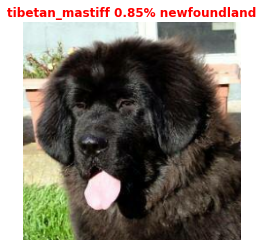

In [121]:
plot_pred(val_label, prediction, val_image, n=61)

In [0]:
def plot_pred_conf(true, preds, n=0):
  """
  Plots the top 10 highest prediction confidences along with the truth label for sample n:
  """
  pred_prob, true = preds[n], true[n]
  pred_label = get_pred_label(pred_prob)
  true_label = get_pred_label(true)
  top_10_pred_index = pred_prob.argsort()[-10:][::-1]
  top_10_pred_value = pred_prob[top_10_pred_index]
  top_10_pred_label = unique_breed[top_10_pred_index]
  #plot
  #plt.figure(figsize=(6,4))
  top_plot = plt.bar(np.arange(len(top_10_pred_label)),
                     top_10_pred_value,
                     color= "grey")
  plt.xticks(np.arange(len(top_10_pred_label)),
             labels= top_10_pred_label,
             rotation= 'vertical')
  if np.isin(true_label, top_10_pred_label):
    top_plot[np.argmax(top_10_pred_label == true_label)].set_color("green")
  else: pass

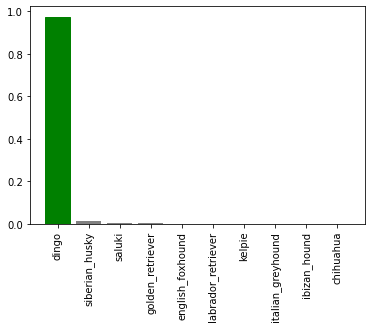

In [123]:
plot_pred_conf(val_label, prediction,65)

#### Combining both the plots:

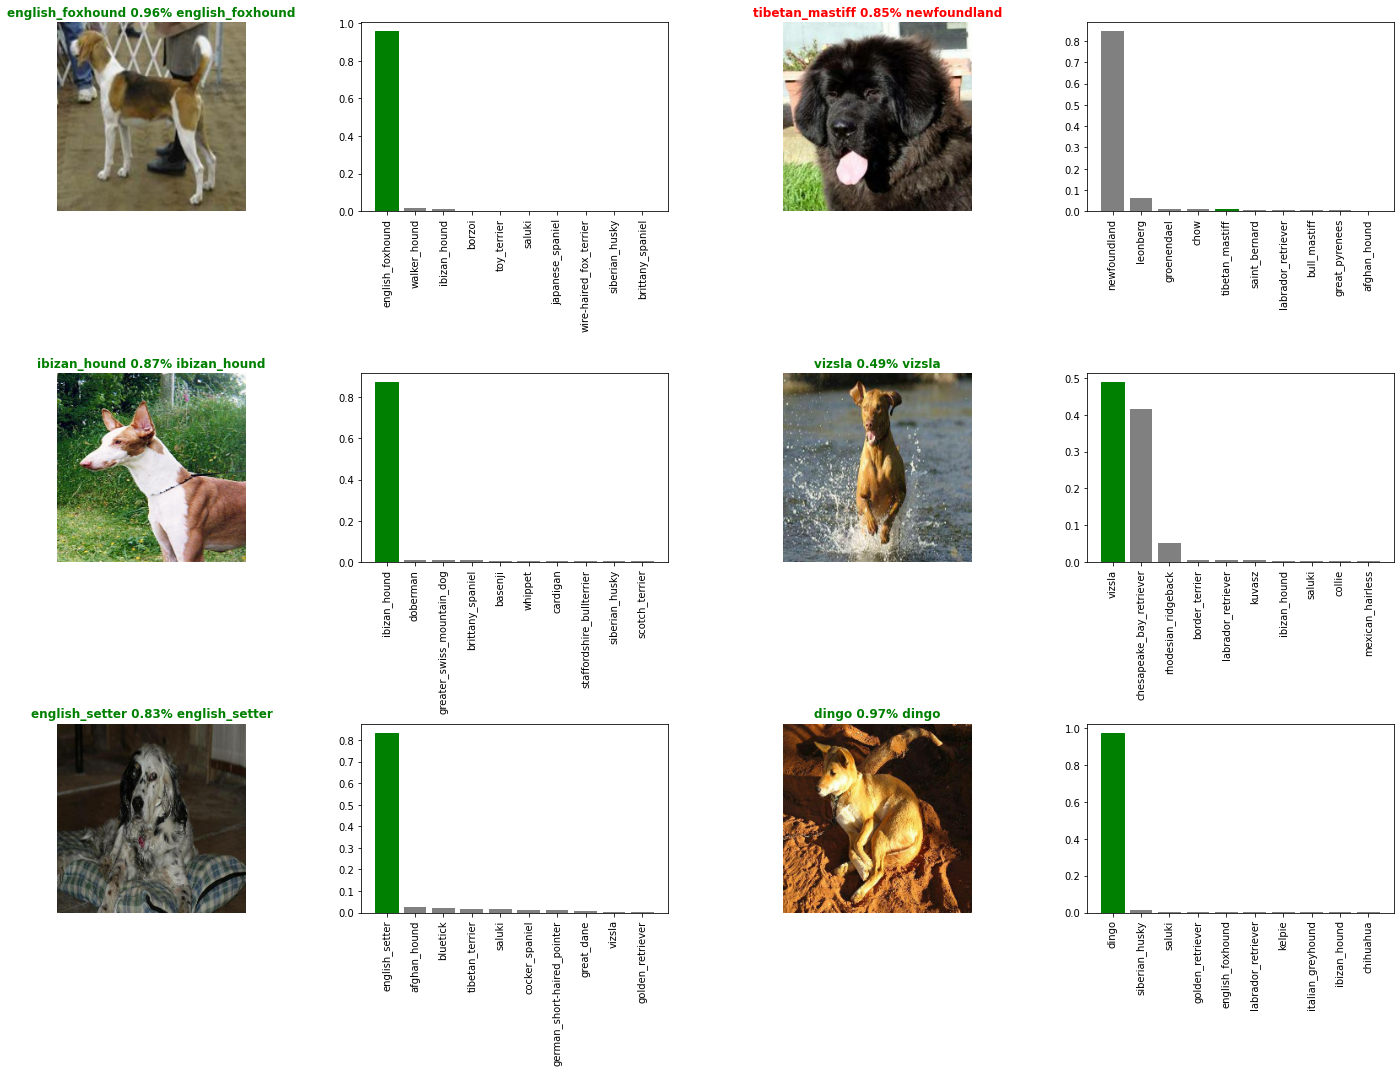

In [124]:
i_mul = 60
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(20,15))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(val_label, prediction, val_image, i+i_mul)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(val_label, prediction, i+i_mul)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving a Trained Model:

In [0]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [0]:
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer": hub.KerasLayer})
  return model

In [127]:
## Saving the model:
save_model(model, "1000_images_Adam")

Saving model to: drive/My Drive/Dog Vision/models/20200525-16331590424420-1000_images_Adam.h5...


'drive/My Drive/Dog Vision/models/20200525-16331590424420-1000_images_Adam.h5'

In [128]:
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20200523-18131590257609-1000_images_Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200523-18131590257609-1000_images_Adam.h5


In [129]:
model.evaluate(valid_data)

7/7 [==============================] - 1s 112ms/step - loss: 1.0647 - accuracy: 0.7050


[1.0647358894348145, 0.7049999833106995]

In [130]:
loaded_1000_image_model.evaluate(valid_data)

7/7 [==============================] - 1s 109ms/step - loss: 1.1299 - accuracy: 0.6650


[1.1299281120300293, 0.6650000214576721]

## Training the Model on Full Dataset:

In [131]:
len(X), len(Y)

(10222, 10222)

In [132]:
full_data = create_data_batches(X, Y)

Creating Training Data Batches...


In [133]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [134]:
full_model = create_model()

Building Model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# callback for complete model:
full_model_tensorboard = tensorboard_callback()
# early stopping for complete model(no validation set):
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience= 3)


In [0]:
# full_model.fit(x= full_data,
#                epochs= NUM_EPOCH,
#                callbacks=[full_model_tensorboard, full_model_early_stopping])

In [0]:
# save_model(full_model, "full_dataset_model_mobilenetv2_Adam")

In [138]:
loaded_full_model= load_model('drive/My Drive/Dog Vision/models/20200523-18141590257667-full_dataset_model_mobilenetv2_Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200523-18141590257667-full_dataset_model_mobilenetv2_Adam.h5


## Making Prediction on Test Data Set

In [139]:
test_path = "/content/drive/My Drive/Dog Vision/test/"
test_filename = [test_path + fname for fname in os.listdir(test_path)]
test_filename[:10]

['/content/drive/My Drive/Dog Vision/test/ea280d6cb873df2eb683f0a5f13e3dce.jpg',
 '/content/drive/My Drive/Dog Vision/test/ed6d16749ad7dbed282857c6c0cb0b64.jpg',
 '/content/drive/My Drive/Dog Vision/test/f1b634511c0ca2fcdf53c9c30f3358c9.jpg',
 '/content/drive/My Drive/Dog Vision/test/ea1e945b924638c2059d7718b522d48f.jpg',
 '/content/drive/My Drive/Dog Vision/test/f2e4e4f1ab9d156443682dc4653f23e5.jpg',
 '/content/drive/My Drive/Dog Vision/test/f1eadf24d904d3c1e26d8081555901be.jpg',
 '/content/drive/My Drive/Dog Vision/test/ea111bb38037c9922185a0e9513391d7.jpg',
 '/content/drive/My Drive/Dog Vision/test/ecab96d4268569065f73b4bb5ddffa59.jpg',
 '/content/drive/My Drive/Dog Vision/test/ee83a788c6e24159a62e756a34dd4045.jpg',
 '/content/drive/My Drive/Dog Vision/test/f4a2ee1dd5542da8b0150fe8f7a2b7c3.jpg']

In [140]:
len(test_filename)

10357

In [141]:
test_data = create_data_batches(test_filename, test_data= True)

Creating Test Data Batches...


In [142]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [0]:
# test_prediction = loaded_full_model.predict(test_data,  
#                                             verbose=1)

In [0]:
# test_prediction

In [0]:
# max(test_prediction[0])

In [0]:
# # Saving Prediictons:
# np.savetxt("/content/drive/My Drive/Dog Vision/test_preds_array.csv", test_prediction, delimiter=",")

In [0]:
test_preds = np.loadtxt("/content/drive/My Drive/Dog Vision/test_preds_array.csv", delimiter=",")

In [148]:
test_preds

array([[2.19895435e-03, 2.23404871e-11, 5.44300750e-11, ...,
        1.64480951e-12, 1.68294892e-11, 7.84557471e-07],
       [7.68036844e-05, 1.80951261e-03, 1.01047404e-09, ...,
        3.90643748e-07, 7.70776276e-10, 7.96096611e-09],
       [1.11278924e-10, 9.02002473e-09, 1.28815127e-08, ...,
        3.70090347e-11, 7.30591643e-10, 1.04211805e-13],
       ...,
       [1.60208890e-12, 6.07175039e-08, 1.32201292e-10, ...,
        7.71807271e-12, 1.33608226e-13, 2.37374812e-12],
       [1.63124869e-09, 2.58197474e-07, 4.02206524e-07, ...,
        4.43856862e-09, 7.82070344e-07, 7.96841846e-08],
       [2.77140940e-13, 6.53401287e-07, 1.69715752e-11, ...,
        4.09894729e-10, 6.39795217e-10, 2.44009674e-11]])

In [149]:
len(test_preds), len(test_preds[0])

(10357, 120)

## Converting into Required Format: 
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation


In [150]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breed))
preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [151]:
test_id = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_id[:5]

['ea280d6cb873df2eb683f0a5f13e3dce',
 'ed6d16749ad7dbed282857c6c0cb0b64',
 'f1b634511c0ca2fcdf53c9c30f3358c9',
 'ea1e945b924638c2059d7718b522d48f',
 'f2e4e4f1ab9d156443682dc4653f23e5']

In [152]:
preds_df["id"] = test_id
preds_df.head()

id  ... yorkshire_terrier
0  ea280d6cb873df2eb683f0a5f13e3dce  ...               NaN
1  ed6d16749ad7dbed282857c6c0cb0b64  ...               NaN
2  f1b634511c0ca2fcdf53c9c30f3358c9  ...               NaN
3  ea1e945b924638c2059d7718b522d48f  ...               NaN
4  f2e4e4f1ab9d156443682dc4653f23e5  ...               NaN

[5 rows x 121 columns]

In [153]:
preds_df[list(unique_breed)] = test_preds # or test_preds
preds_df.head()

id  ... yorkshire_terrier
0  ea280d6cb873df2eb683f0a5f13e3dce  ...       7.84557e-07
1  ed6d16749ad7dbed282857c6c0cb0b64  ...       7.96097e-09
2  f1b634511c0ca2fcdf53c9c30f3358c9  ...       1.04212e-13
3  ea1e945b924638c2059d7718b522d48f  ...       1.09018e-09
4  f2e4e4f1ab9d156443682dc4653f23e5  ...       1.25905e-09

[5 rows x 121 columns]

In [0]:
# preds_df.to_csv("/content/drive/My Drive/Dog Vision/full_model_prediction_on_mobilenetV2_for_submission.csv",
#                 index= False)

## Testing on Custom Images:


In [0]:
custom_path = "/content/drive/My Drive/Dog Vision/custom images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [156]:
custom_image_paths

['/content/drive/My Drive/Dog Vision/custom images/afghanskychrt.jpg',
 '/content/drive/My Drive/Dog Vision/custom images/appenzeller-sennenhund-im-grass-768x576.jpg',
 '/content/drive/My Drive/Dog Vision/custom images/Male_fawn_Boxer_undocked.jpg',
 '/content/drive/My Drive/Dog Vision/custom images/Cairn-Terrier-sitting-in-the-grass.jpg',
 '/content/drive/My Drive/Dog Vision/custom images/rottweiler02da6a0076ed61c526fda7e1ac0da986.jpg']

In [157]:
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating Test Data Batches...


In [158]:
custom_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [159]:
custom_preds = loaded_full_model.predict(custom_data, verbose=1)

1/1 [==============================] - 0s 1ms/step


In [160]:
custom_preds.shape

(5, 120)

In [161]:
custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels

['afghan_hound', 'appenzeller', 'boxer', 'cairn', 'rottweiler']

In [0]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

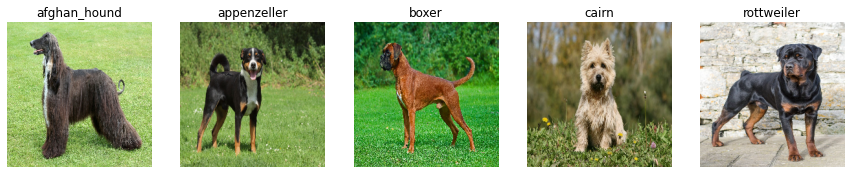

In [163]:
plt.figure(figsize=(15,10))
for i, image  in enumerate(custom_images):
  plt.subplot(1,5,i+1)
  plt.axis("off")
  plt.title(custom_preds_labels[i])
  plt.imshow(image)